The following notebook shows the implementation of hyperparamter tuning on a CNN built to process the FashionMNIST dataset.



The necessary libraries from tensorflow and matplotlib are imported.

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf




*  The Fashion MNIST dataset from the library tensorflow.datasets is loaded. The training and test sets are already divided in the dataset and can be easily retrieved and used.It contains a total of 10 classes and is used for classification purposes.
*  Images are nothing but a matrix made up of pixel values which range from 0 to 255.
*  In order to help in processing, the pixel values are normalised by dividing each pixel value by 255 to obtain the new values between 0 to 1.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


Follwing are some of the elements of the FashionMNIST dataset and the titles represent the integer values given to the particular type of apparel.
i.e. 9 for shoe , 0 for shirts/topwear 

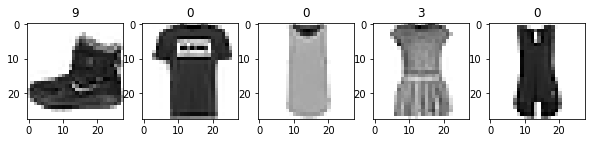

In [9]:
plt.figure(figsize=(10,10))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.title(y_train[i])
  plt.imshow(x_train[i], cmap='gray_r')

The appropriate loss and optimizers to be used are defined in the below cell.
We use Categorical cross entropy loss function as we are dealing with a multiclass classification problem.(10 classes)
Adam optimzer is the most popular opitmizer choice and works well for most models.

In [ ]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

* A CNN model architecture is defined below with different convolutional and max pooling layers placed alternatively.
* The max pooling layers are used to reduce the dimensions of the inputs to help the model process better.
* Therefore,convolutinal layers make the image deeper and the max pooling layers reduce the size of images.
* The model used 3 convolutional layers of depth 16,64,256 respectively with kernels of dimensions 3 by 3 and were alternated with Maxpooling layers to reduce the dimensionality.
* The final output was flattened to get a linear input in order to feed it to the first fully connected layer on which a ReLU activation function was applied and the output passed on to a final fully connected layer wherein a softmax activation function was applied to map the output to one of the 10 classes of the dataset.

In [ ]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1), padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")) #changed the depth of the convolutional layer
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same")) #added a convolution layer
model.add(tf.keras.layers.MaxPooling2D(2,2))                                     #added a max pool layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

The model is now compiled and the appropriate loss function and metrics used to evaluate the model, accuracy in our case.

In [ ]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

The images are reshaped to an appropriate size for feeding into the CNN layer as defined in the first layer of the model architecture.

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
y_train = to_categorical(y_train, 10)
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_test = to_categorical(y_test, 10)

The model is now trained on the train data and validated using the test data provided to us in the FashionMNIST dataset and a validation accuracy of 91.55% is achieved after 8 epochs.

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=8,batch_size=32)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 136s 72ms/step - loss: 0.4179 - accuracy: 0.8462 - val_loss: 0.3278 - val_accuracy: 0.8778
Epoch 2/8
1875/1875 [==============================] - 134s 72ms/step - loss: 0.2793 - accuracy: 0.8984 - val_loss: 0.2918 - val_accuracy: 0.8937
Epoch 3/8
1875/1875 [==============================] - 136s 72ms/step - loss: 0.2421 - accuracy: 0.9115 - val_loss: 0.2928 - val_accuracy: 0.8977
Epoch 4/8
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2172 - accuracy: 0.9209 - val_loss: 0.2773 - val_accuracy: 0.9015
Epoch 5/8
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1961 - accuracy: 0.9275 - val_loss: 0.2792 - val_accuracy: 0.9013
Epoch 6/8
1875/1875 [==============================] - 138s 73ms/step - loss: 0.1828 - accuracy: 0.9326 - val_loss: 0.2517 - val_accuracy: 0.9104
Epoch 7/8
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1648 - accuracy: 0.9388 - val_loss: 0.2527 - val_accur

Here, we visualise the loss and accuracy of the train and validation data and observe that both losses keep decreasing and a subsequent rise in the accuracies seen.

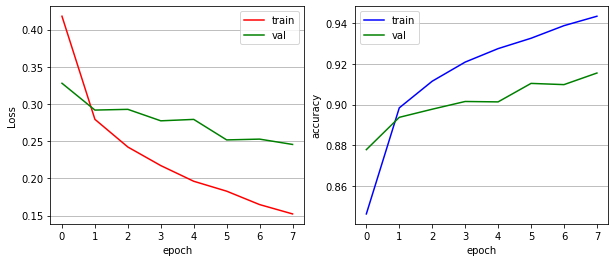

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')

# HYPERPARAMETER TUNING
A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learnt.

L2 regularization, Dropout and Keras autotuner is used in this notebook to demonstrate the same.

## L2 REGULARIZATION

L2 regularization adds a penalty term to the cost
function thus ,again preventing overfitting. 

L2 was used in the weights and bias regularization
for the network during backpropagation.

In [ ]:
from keras.regularizers import l2

model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1), padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")) 
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2,2))                                    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu")) #regularisation added to this layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

The model is now compiled and trained in the similar way as before.

In [ ]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

The model gave us a max accuracy of 91.66% on the validation dataset.

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=8,batch_size=32)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 139s 74ms/step - loss: 0.2420 - accuracy: 0.9259 - val_loss: 0.2882 - val_accuracy: 0.9098
Epoch 2/8
1875/1875 [==============================] - 138s 74ms/step - loss: 0.2341 - accuracy: 0.9290 - val_loss: 0.2750 - val_accuracy: 0.9152
Epoch 3/8
1875/1875 [==============================] - 140s 75ms/step - loss: 0.2254 - accuracy: 0.9320 - val_loss: 0.2829 - val_accuracy: 0.9126
Epoch 4/8
1875/1875 [==============================] - 140s 74ms/step - loss: 0.2198 - accuracy: 0.9345 - val_loss: 0.2930 - val_accuracy: 0.9116
Epoch 5/8
1875/1875 [==============================] - 139s 74ms/step - loss: 0.2118 - accuracy: 0.9382 - val_loss: 0.2804 - val_accuracy: 0.9166
Epoch 6/8
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2063 - accuracy: 0.9390 - val_loss: 0.2977 - val_accuracy: 0.9103
Epoch 7/8
1875/1875 [==============================] - 140s 75ms/step - loss: 0.2010 - accuracy: 0.9405 - val_loss: 0.2912 - val_accur

The loss and accuracy graphs are plotted and the behaviour of the model observed.

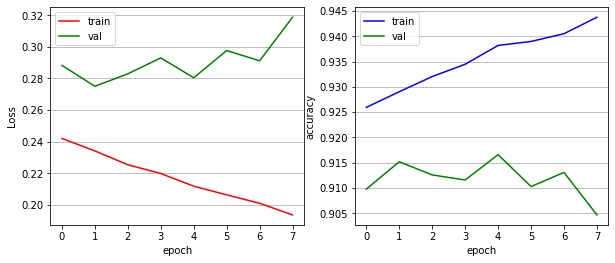

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')


## Dropout

* Dropout is the process in which we turn off
certain nodes in the network to prevent any
overfitting.
* A dropout of 0.3 was applied on the fully
connected hidden layer i.e. 30% of the nodes randomly turned off while training the model.

In [ ]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1), padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same")) 
model.add(tf.keras.layers.MaxPooling2D(2,2))                                     
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))                                          #added a dropout layer of 30%
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

The model is now compiled and trained in the similar way as before.

In [ ]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

The model gave us max accuracy of 91.61% on the validation dataset.

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=8,batch_size=32)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 137s 73ms/step - loss: 0.4075 - accuracy: 0.8508 - val_loss: 0.2997 - val_accuracy: 0.8897
Epoch 2/8
1875/1875 [==============================] - 137s 73ms/step - loss: 0.2748 - accuracy: 0.8991 - val_loss: 0.2711 - val_accuracy: 0.9012
Epoch 3/8
1875/1875 [==============================] - 136s 73ms/step - loss: 0.2399 - accuracy: 0.9107 - val_loss: 0.2516 - val_accuracy: 0.9087
Epoch 4/8
1875/1875 [==============================] - 139s 74ms/step - loss: 0.2165 - accuracy: 0.9197 - val_loss: 0.2394 - val_accuracy: 0.9105
Epoch 5/8
1875/1875 [==============================] - 136s 73ms/step - loss: 0.1990 - accuracy: 0.9259 - val_loss: 0.2430 - val_accuracy: 0.9143
Epoch 6/8
1875/1875 [==============================] - 136s 72ms/step - loss: 0.1817 - accuracy: 0.9327 - val_loss: 0.2403 - val_accuracy: 0.9161
Epoch 7/8
1875/1875 [==============================] - 136s 73ms/step - loss: 0.1698 - accuracy: 0.9367 - val_loss: 0.2370 - val_accur

The loss and accuracy graphs are plotted and the behaviour of the model observed.

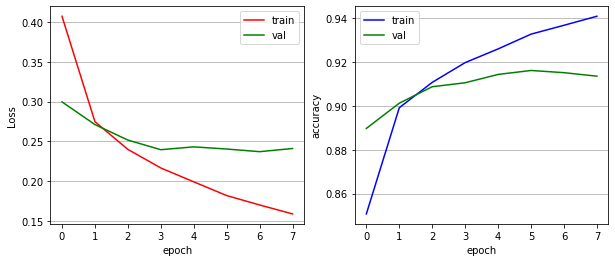

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')

## Auto tuning using Keras Tuner

* Keras tuner is the automatic tuning tool though which we can give range of values to choose from for hyperparameters for the kernels,learning rate, convolutional 2D layer dimensions and the best ones are tried out and set.

* The three parameters I changed were:

  1. Learning rate - 0.01,0.001,0.0001
  2. Kernel size - 3,4,5
  3. Size of fully connected layer - 32 to 128 with a step size of 32

* The model was trained on these parameters for 5 trials for 10 epochs each time, the best parameters chosen, the best epoch taken and the model finally trained for only the given max epochs to get the best accuracy as given by the autotuner.

In [ ]:
!pip install keras-tuner

The model is defined in the similar fashion as that of any other CNN.

We also provide the alternate values we would want the autotuner to look into and select the best out of them.

In [ ]:
def build_model(hp):
  model1 =models.Sequential()
  hp_units1 = hp.Int('units1', min_value=32, max_value=128, step=32)  
  model1.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1), padding="same"))
  model1.add(tf.keras.layers.MaxPooling2D(2,2))
  model1.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")) 
  model1.add(tf.keras.layers.MaxPooling2D(2,2))
  model1.add(tf.keras.layers.Conv2D(256,activation="relu", padding="same",kernel_size=hp.Choice('conv_1_kernel', values = [2,3,5]))) #HP2
  model1.add(tf.keras.layers.MaxPooling2D(2,2))                                    
  model1.add(tf.keras.layers.Flatten())
  model1.add(tf.keras.layers.Dense(units=hp_units1, activation="relu"))     #HP1
  model1.add(tf.keras.layers.Dense(10,activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])    #HP3

  model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss=loss_fn,
              metrics=['accuracy'])
  return model1

The auto tuner is set to run and returns us the best accuracy it achieved.

In [ ]:
import keras_tuner as kt
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials = 5,overwrite=True)
tuner.search(x_train, y_train, validation_data=(x_test, y_test),epochs=10,callbacks=[stop_early])


Trial 5 Complete [00h 15m 22s]
val_accuracy: 0.9007999897003174

Best val_accuracy So Far: 0.9190000295639038
Total elapsed time: 01h 40m 19s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


The best hyper parameters chosen by the autotuner are now chosen to build the final model.

It gave us an accuracy of 92.16% on the validation dataset.

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model1= tuner.hypermodel.build(best_hps)
history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 136s 72ms/step - loss: 0.4274 - accuracy: 0.8430 - val_loss: 0.3496 - val_accuracy: 0.8717
Epoch 2/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.2715 - accuracy: 0.9010 - val_loss: 0.2733 - val_accuracy: 0.9023
Epoch 3/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2266 - accuracy: 0.9170 - val_loss: 0.2474 - val_accuracy: 0.9102
Epoch 4/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1927 - accuracy: 0.9282 - val_loss: 0.2420 - val_accuracy: 0.9113
Epoch 5/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.1666 - accuracy: 0.9392 - val_loss: 0.2405 - val_accuracy: 0.9160
Epoch 6/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1417 - accuracy: 0.9470 - val_loss: 0.2356 - val_accuracy: 0.9173
Epoch 7/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1218 - accuracy: 0.9545 - val_loss: 0.2478 - val

The loss and accuracy graphs are plotted and the behaviour of the model observed.

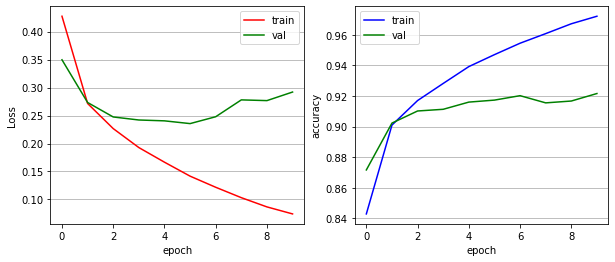

In [ ]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')